###### Import Required lib

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the height and weight dataset

In [10]:
df=pd.read_csv(r"D:\2024\Data sets\weight-height.csv")

###### Exploring the dataset

In [12]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


###### check the data types of the dataset

In [14]:
df.dtypes

Gender     object
Height    float64
Weight    float64
dtype: object

###### check the missing values in the dataset

In [16]:
df.isnull().any()

Gender    False
Height    False
Weight    False
dtype: bool

###### Removing the outlier using the Z- score and 3 standard deviation

###### Now we go for Height 

In [19]:
df_ht=df.drop("Weight",axis=1)

In [20]:
df_ht

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


<Axes: xlabel='Gender', ylabel='Height'>

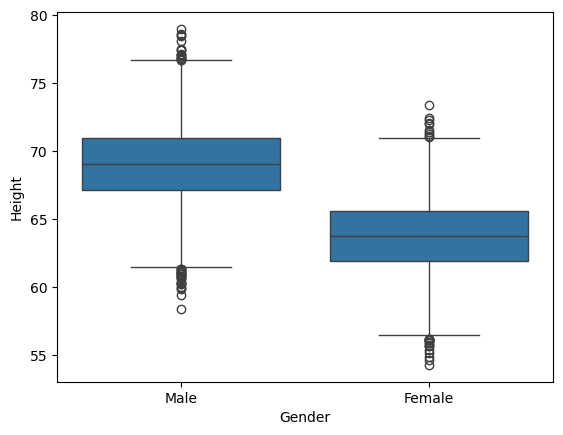

In [21]:
sns.boxplot(x=df_ht["Gender"],y=df_ht["Height"])

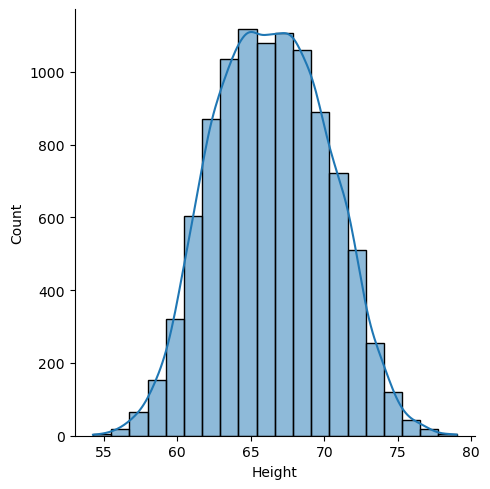

In [22]:
sns.displot(df_ht["Height"],kde="False",bins=20)
plt.show()

<Axes: ylabel='Height'>

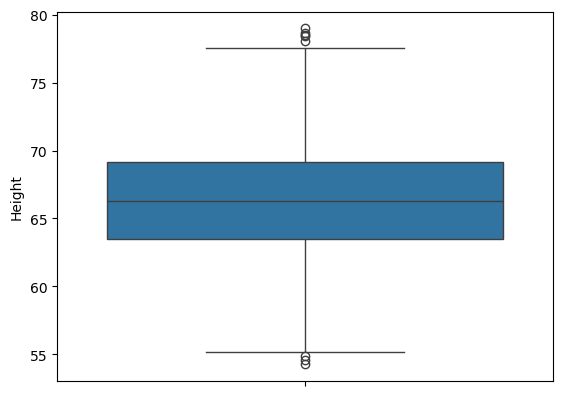

In [23]:
sns.boxplot(df_ht["Height"])

In [24]:
df_ht["Height"].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

##### 3 Standard deviation is standard method of practice to remove the outliers

In [26]:
upper_limit=df_ht.Height.mean()+3*df_ht.Height.std()
upper_limit

77.91014411714094

In [27]:
lower_limit=df_ht.Height.mean()-3*df_ht.Height.std()
lower_limit

54.82497539250154

In [28]:
df_ht[(df_ht.Height>upper_limit)|(df_ht.Height<lower_limit)]

,Gender,Height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [29]:
no_outlier=df_ht[(df_ht.Height<upper_limit)&(df_ht.Height>lower_limit)]

In [30]:
no_outlier

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


In [31]:
no_outlier.shape

(9993, 2)

###### check how many outlier are ther in the dataset

In [33]:
df_ht.shape[0]-no_outlier.shape[0]

7

##### 7 outliers are there in the dataset

### 1.Above we used the 3 standard devaition 

## 2.Now we use z- Score 

In [37]:
df_ht['zscore']=(df_ht.Height-df_ht.Height.mean())/df_ht.Height.std()
df_ht.head()

,Gender,Height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [38]:
df_ht[df_ht['zscore']>3]

,Gender,Height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854


In [39]:
df_ht[df_ht['zscore']<-3]

,Gender,Height,zscore
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [40]:
df_ht[(df_ht['zscore']>3)|(df_ht['zscore']<-3)]

,Gender,Height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


###### total 7 outlier using the z score we got

## 3. now we use percentile method

In [61]:
df=pd.read_csv(r"D:\2024\Data sets\weight-height.csv")

In [63]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [ ]:
df=df.drop("Weight",axis=1)

In [ ]:
max_limit=df["Height"].quantile(0.95)
max_limit

##### anything above this is a outlier

In [127]:
up_outliers=df[df["Height"]>max_limit]

In [129]:
up_outliers.shape[0]

500

In [131]:
min_limit=df["Height"].quantile(0.05)
min_limit

60.24622082610544

###### anything below this is a outlier

In [138]:
low_outliers=df[df["Height"]<min_limit]
low_outliers

,Gender,Height
1942,Male,59.981865
2191,Male,59.938650
2334,Male,59.380650
3020,Male,60.217019
4170,Male,60.243718
...,...,...
9978,Female,57.375759
9984,Female,59.047029
9988,Female,59.538729
9993,Female,60.030434


In [140]:
low_outliers.shape[0]

500

In [142]:
df.shape

(10000, 2)

In [152]:
clean=df[(df["Height"]<max_limit)&(df["Height"]>min_limit)]

In [154]:
clean.shape

(9000, 2)

In [156]:
clean

,Gender,Height
1,Male,68.781904
3,Male,71.730978
4,Male,69.881796
5,Male,67.253016
6,Male,68.785081
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


<Axes: ylabel='Height'>

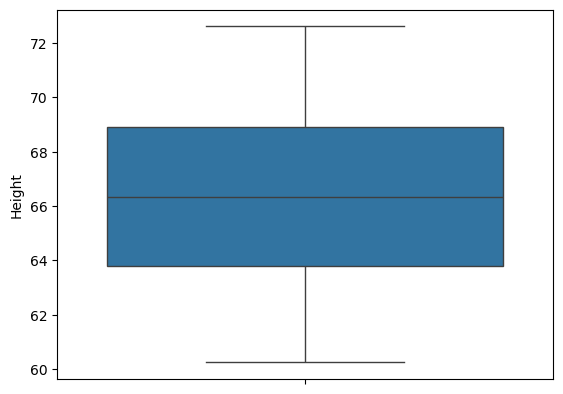

In [160]:
sns.boxplot(clean["Height"])

##### There are no oulier in the above data